<a href="https://colab.research.google.com/github/maxim371/CheatSheets/blob/master/LS_DS_Unit_4_Sprint_Challenge_3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
from tensorflow.keras.datasets import reuters

from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM


(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [105]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [106]:
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1
batch_size=10

# TODO - your code!
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(X_train, maxlen=maxlen)
x_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)


Pad sequences (samples x time)
x_train shape: (8982,)
x_test shape: (2246,)


In [108]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='relu'))

Build model...


In [109]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/5
8982/8982 [==============================] - 146s 16ms/step - loss: -119.5202 - accuracy: 0.0197 - val_loss: -119.0473 - val_accuracy: 0.0120
Epoch 2/5
8982/8982 [==============================] - 143s 16ms/step - loss: -121.3122 - accuracy: 0.0216 - val_loss: -119.0473 - val_accuracy: 0.0120
Epoch 3/5
8982/8982 [==============================] - 143s 16ms/step - loss: -121.3122 - accuracy: 0.0191 - val_loss: -119.0473 - val_accuracy: 0.0120
Epoch 4/5
8982/8982 [==============================] - 144s 16ms/step - loss: -121.3122 - accuracy: 0.0190 - val_loss: -119.0473 - val_accuracy: 0.0120
Epoch 5/5
2246/2246 [==============================] - 3s 1ms/step
Test score: -119.04726091624367
Test accuracy: 0.01202137116342783


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*



## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*



## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*


###pad_sequences method used on the training dataset is used to ensure that all sequences in a list have the same length. sequences that are shorter and padded with values at the end. sequences that are longer are truncated so that they fit the desired length.

###LSTM is a specialized RNN able to remember things in the long term over RNN. LSTM excel over RNN when there is evolving datasets where interaction between past and present is sensitive and important to make a prediction

###LSTM and RNN excel at sequence data or data with temporal relationship
*machine translation
*Recognition of connected handwriting
*speech recognition

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2 to help resize the images prior to inference. 

In [0]:
from skimage.io import imread_collection


images = imread_collection('./frog_images/*.jpg')

In [103]:
print(type(images))
print(type(images[0]), end="\n\n")

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>



Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [0]:
import numpy as np

from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image

def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))
def img_contains_bullfrog(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    #for entry in results:
     #   if entry[1] == 'bullfrog':
      #      return entry[2]
    #return 0.0    

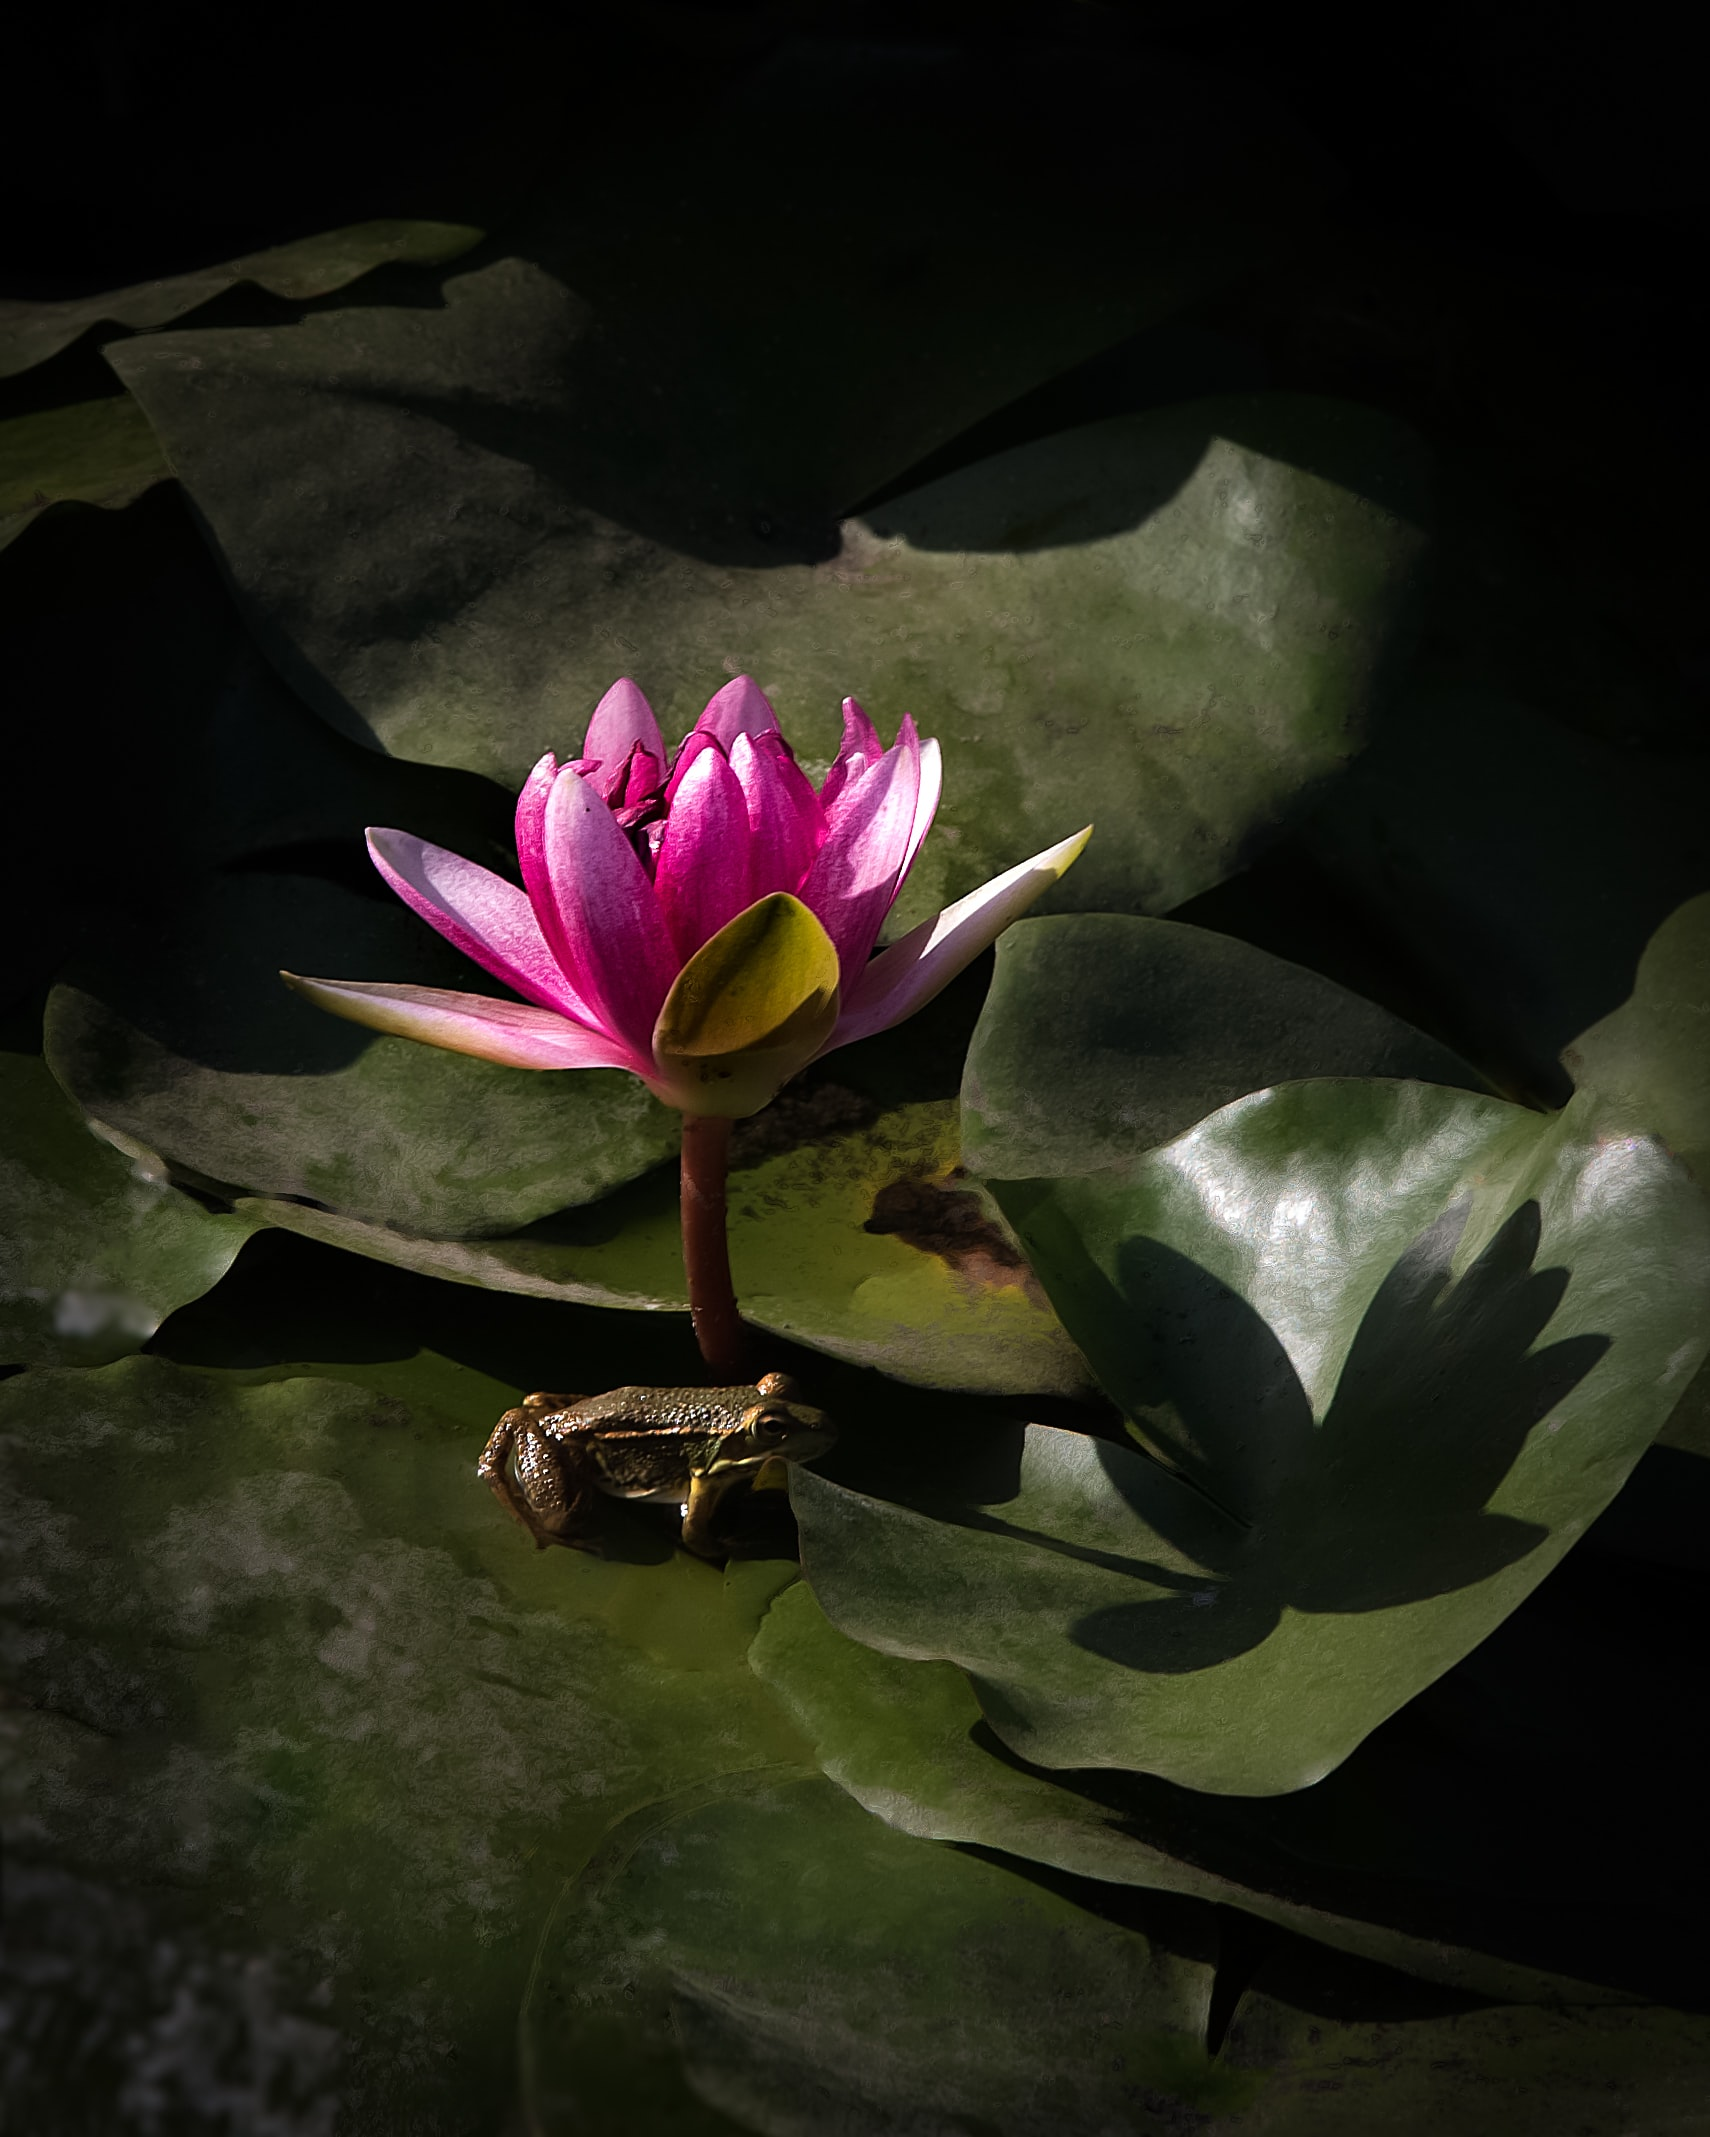

In [92]:
from IPython.display import Image
Image(filename='/content/frog_images/cristiane-teston-bcnfJvEYm1Y-unsplash - Copy.jpg', width=600)

In [93]:
img_contains_bullfrog(process_img_path('/content/frog_images/cristiane-teston-bcnfJvEYm1Y-unsplash - Copy.jpg'))

[('n01930112', 'nematode', 0.106459506), ('n03729826', 'matchstick', 0.028519917), ('n03804744', 'nail', 0.025965067)]


In [0]:
example1='/content/frog_images/ed-van-duijn-S1zA6AR50X8-unsplash - Copy.jpg'
example2='/content/frog_images/joel-henry-Rcvf6-n1gc8-unsplash.jpg'

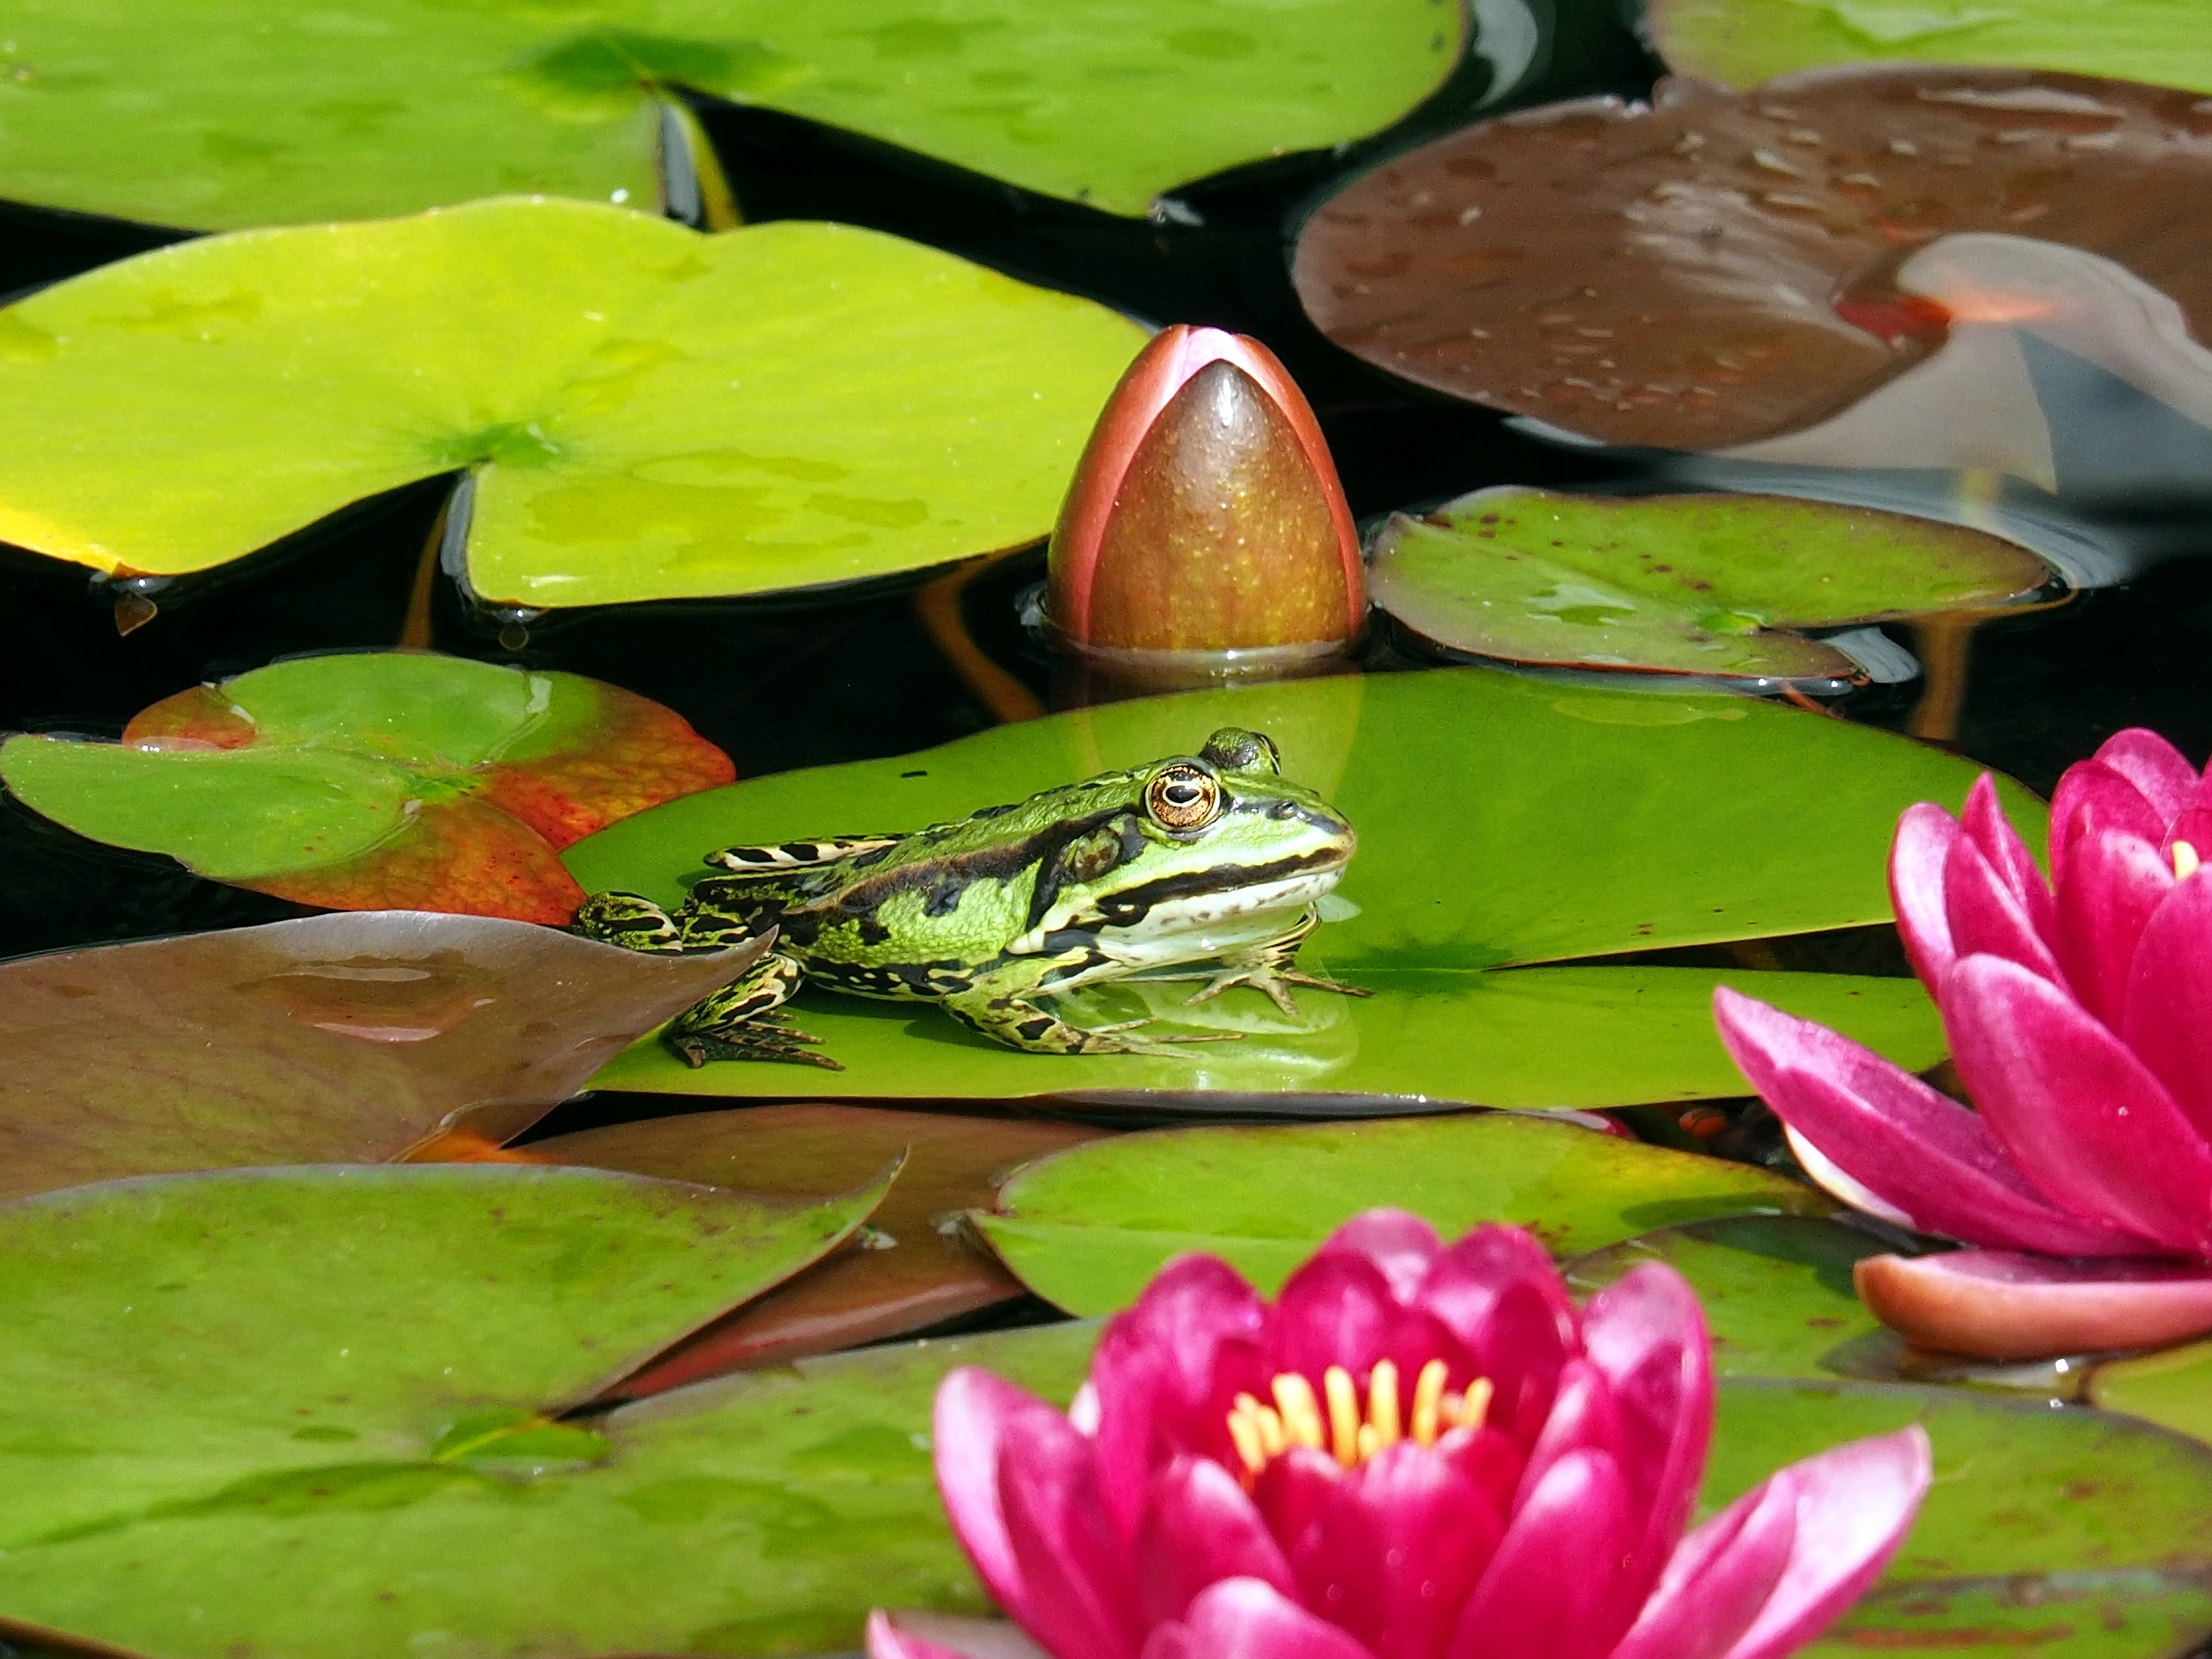

In [95]:
from IPython.display import Image
Image(filename=example1, width=600)

In [96]:
img_contains_bullfrog(process_img_path(example1))

[('n01930112', 'nematode', 0.10226466), ('n03729826', 'matchstick', 0.03331696), ('n04266014', 'space_shuttle', 0.028665204)]


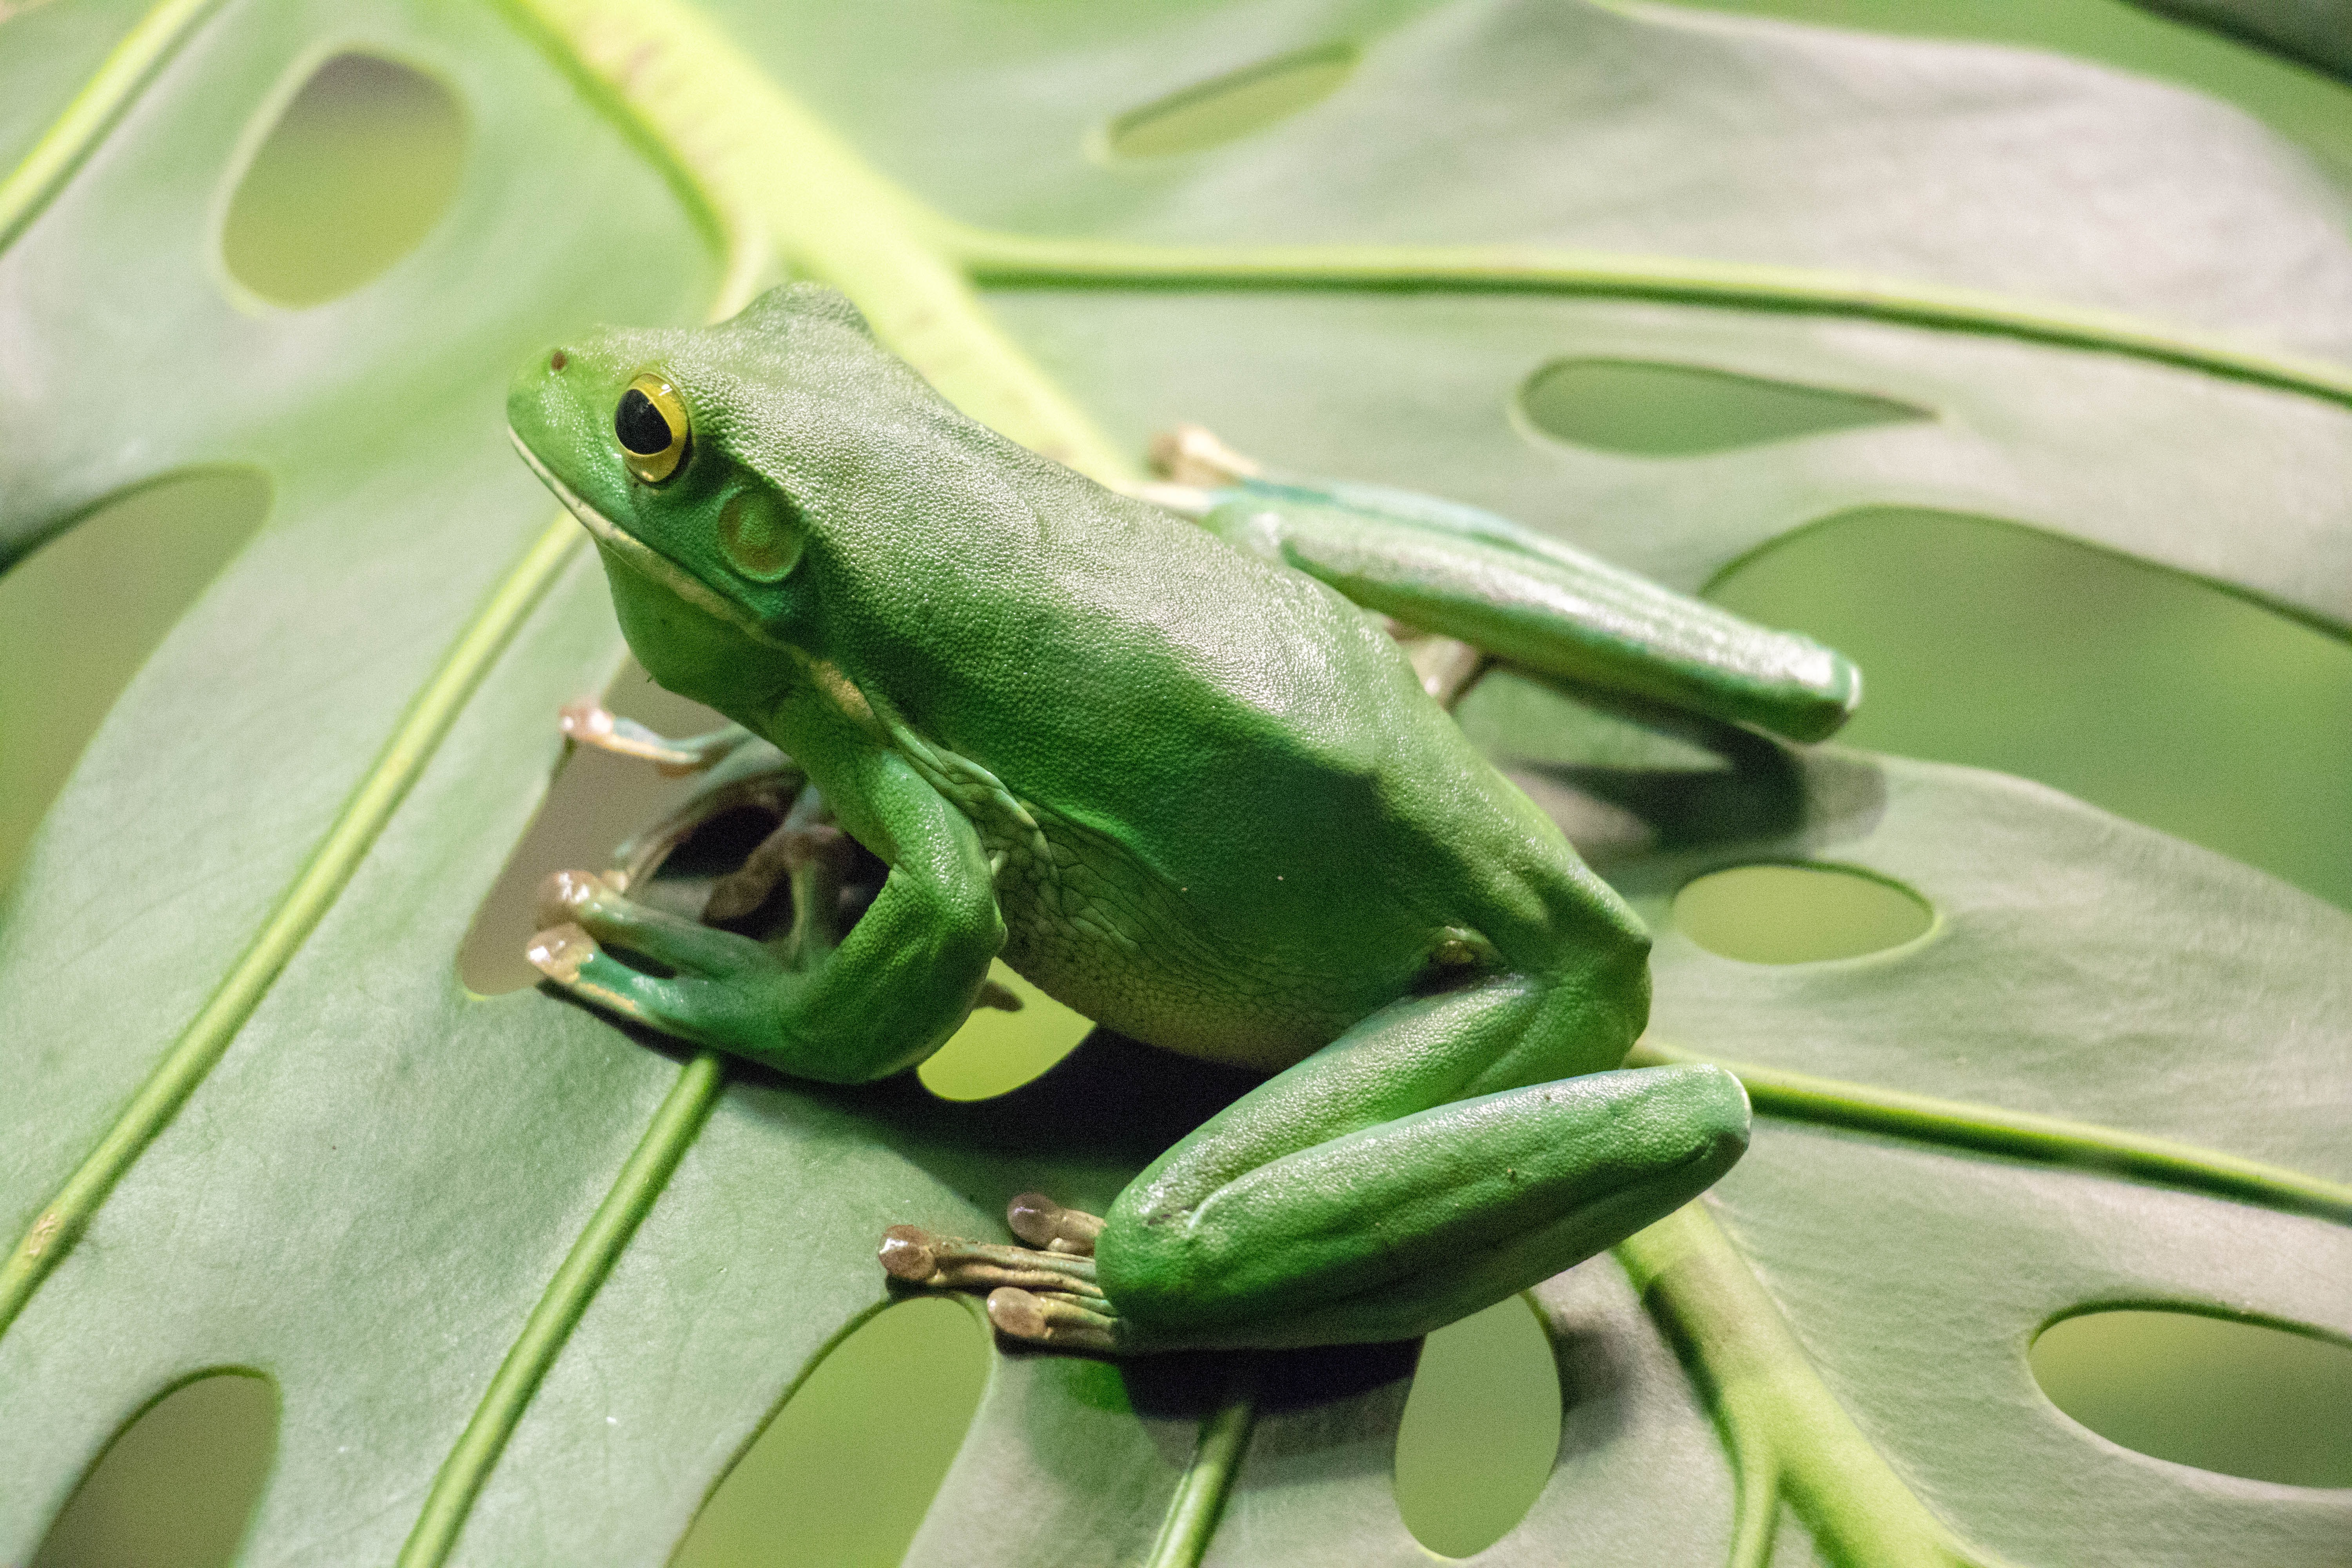

In [97]:
from IPython.display import Image
Image(filename=example2, width=600)

In [98]:
img_contains_bullfrog(process_img_path(example2))

[('n01930112', 'nematode', 0.06528423), ('n03729826', 'matchstick', 0.047746178), ('n04153751', 'screw', 0.034196135)]


<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 


Autoencoder is a special case of feed-forward network which is used to learn efficient data encodings in an unsupervised manner. Autoencoder is used mainly for dimesionality reduction and information retrieval.It is also be used in face recognition

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?
- What are the threats posed by AI to our society?
- How do you think we can counteract those threats? 
- Do you think achieving General Artifical Intelligence is ever possible?

A few sentences per answer is fine - only elaborate if time allows.

### My strongest area in datascience will be processing data and building predictive models.

###I would like to get better and building machine learning applications because that ability would help me create products for people

###There is a lot of research in this area so in 5 years there will be more breakthroughs in computational time and space. Data science will be as ever important since data continues to grow

###General artificial intelligence. People continue to lose their jobs to automation. It is also not easy to just learn a new skill which leads to a widening gap between the rich and poor. Software continues to eat the world.

###Educate the children and make them the new reality. The educational system needs to revamp the curriculum to help kids understand where the direction of this world and their career choices within this frame.

###General Artificial Intelligence is ever possible but that will be a long time because research takes years. The scope of memory, processing power and the complexity of the problem means it will make many years for General Artificial Intelligence to be a reality

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [26]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")